<a href="https://colab.research.google.com/github/Elahehpouryaghoub/Nanoparticles_Toxicity/blob/main/Nanoparticle_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Loading Dataset

In [1]:
#uploading the dataset

from google.colab import files
uploaded = files.upload()

Saving Fixed_Encoded_Nanotoxicity_Dataset.csv to Fixed_Encoded_Nanotoxicity_Dataset.csv


In [26]:
import pandas as pd
df_nano = pd.read_csv("Fixed_Encoded_Nanotoxicity_Dataset.csv")
df_nano

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,0
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,0
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,0
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,0
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,0
...,...,...,...,...,...,...,...,...,...,...,...
876,ZnO,45.3,310.0,32.7,21.3,-3.89,24,20.000,1.65,1,1
877,ZnO,32.0,1093.0,21.6,37.0,-3.89,24,25.000,1.65,1,1
878,ZnO,46.3,239.0,42.8,24.1,-5.17,12,100.000,1.90,1,1
879,ZnO,35.6,295.5,-41.6,27.9,-3.89,24,10.000,1.65,1,1


In [27]:
df_nano.shape

(881, 11)

In [28]:
df_nano["class"].value_counts()
#Toxic= 1 , nontoxic= 0

,count
class,
1,476
0,405


In [29]:
# checking to see if there are any missing values
print(df_nano.isna().any().any())

False


## 2.Preprocessing

In [30]:
import pandas as pd
# Applying One-Hot Encoding to the NPs column
df_nano = pd.get_dummies(df_nano, columns=['NPs'] , dtype= int)
print(df_nano.head())

   coresize  hydrosize  surfcharge  surfarea    Ec  Expotime  dosage     e  \
0      39.7      267.0        36.3      64.7 -1.51        24   0.001  1.61   
1      39.7      267.0        36.3      64.7 -1.51        24   0.010  1.61   
2      39.7      267.0        36.3      64.7 -1.51        24   0.100  1.61   
3      39.7      267.0        36.3      64.7 -1.51        24   1.000  1.61   
4      39.7      267.0        36.3      64.7 -1.51        24   5.000  1.61   

   NOxygen  class  NPs_Al2O3  NPs_CuO  NPs_Fe2O3  NPs_TiO2  NPs_ZnO  
0        3      0          1        0          0         0        0  
1        3      0          1        0          0         0        0  
2        3      0          1        0          0         0        0  
3        3      0          1        0          0         0        0  
4        3      0          1        0          0         0        0  


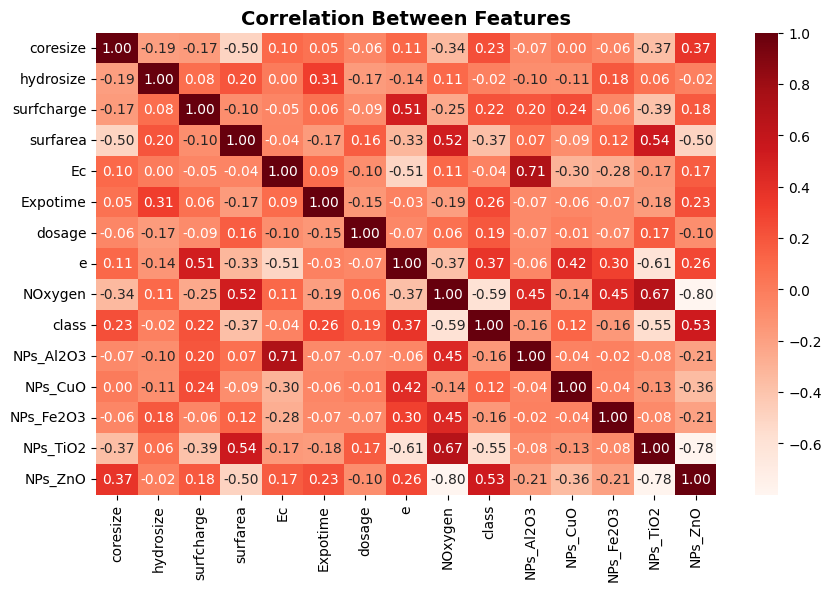

In [32]:
# correlation between features and class
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_nano.corr(numeric_only=True)  # Only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f")

plt.title("Correlation Between Features", fontsize=14, fontweight="bold")
plt.show()


In [33]:
# separating the target column from the rest
X = df_nano.drop(columns=['class'])  # Features (all except 'class')
y = df_nano['class']                 # Target variable (0 = nonToxic, 1 = Toxic)

In [34]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( X , y , test_size= 0.2 , random_state=42)

In [35]:
# Normalizing numerical features (excluding the one-hot encoded columns)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
# Convert back to DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)#x loses column names, making it harder to interpret the data.
# so we convert it back to dataframe

print(x_train_scaled.head())
print(y_train.head())


   coresize  hydrosize  surfcharge  surfarea        Ec  Expotime    dosage  \
0  0.222979   0.129452    0.193128  0.174877  0.275956  0.652174  0.003333   
1  0.787234   0.112719    0.354265  0.064039  0.349727  0.043478  0.033333   
2  0.208511   0.576032    0.748815  0.147783  0.349727  1.000000  0.166667   
3  0.321702   0.133409    0.880332  0.070443  0.349727  0.130435  0.000033   
4  0.239149   0.125212    0.000000  0.102956  0.349727  0.304348  0.333333   

          e  NOxygen  NPs_Al2O3  NPs_CuO  NPs_Fe2O3  NPs_TiO2  NPs_ZnO  
0  0.000000      0.5        0.0      0.0        0.0       1.0      0.0  
1  0.305556      0.0        0.0      0.0        0.0       0.0      1.0  
2  0.305556      0.0        0.0      0.0        0.0       0.0      1.0  
3  0.305556      0.0        0.0      0.0        0.0       0.0      1.0  
4  0.305556      0.0        0.0      0.0        0.0       0.0      1.0  
235    0
359    0
548    1
259    0
772    1
Name: class, dtype: int64


In [37]:
print( " Features => train :" , x_train_scaled.shape , " - test:" , x_test_scaled.shape)
print( "Label => train :" , y_train.shape , " - test:" , y_test.shape)

 Features => train : (704, 14)  - test: (177, 14)
Label => train : (704,)  - test: (177,)


## 3. Defining Evaluation Metrics

In [38]:
# making a function for accuracy, recall , precision , and F1
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

def calculating_metrics(y_test , y_train , y_pred_test , y_pred_train):

  acc_train = accuracy_score(y_true = y_train , y_pred= y_pred_train)
  acc_test = accuracy_score(y_true=y_test , y_pred= y_pred_test)

  recall = recall_score(y_true=y_test , y_pred= y_pred_test)
  precision=  precision_score(y_true= y_test , y_pred= y_pred_test)
  f1_train = f1_score(y_train, y_pred_train)  #F1 for Training
  f1_test = f1_score(y_true = y_test , y_pred = y_pred_test) #F1 balances Precision and Recall

  return {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Recall": recall,
        "Precision": precision,
        "F1-Score Train": f1_train,
        "F1-Score Test" : f1_test,
        }

## 4. Defining and Training Models

## XGBOOST

In [39]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic",
    eval_metric="logloss",
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    use_label_encoder=False   )
xgb_model.fit(x_train_scaled , y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500 , class_weight='balanced' )
lr.fit(x_train_scaled , y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10 , min_samples_leaf = 12 , min_samples_split= 5 , criterion= "entropy" , class_weight='balanced')
dt.fit(x_train_scaled , y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=12, min_samples_split=5)

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300 , max_depth= 64 , min_samples_split=5  , random_state= 42)
rf.fit( x_train_scaled ,  y_train)

RandomForestClassifier(max_depth=64, min_samples_split=5, n_estimators=300,
                       random_state=42)

## SVM

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel="poly" , class_weight='balanced')
svm.fit(x_train_scaled , y_train)

SVC(class_weight='balanced', kernel='poly')

## ANN

In [48]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= (128 , 64) , activation= 'relu' , max_iter= 500 , learning_rate= 'adaptive',)
ann.fit(x_train_scaled , y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), learning_rate='adaptive',
              max_iter=500)

## 5. Evaluating Models

In [49]:
import pandas as pd

# Dictionary of trained models
models = {
    "XGBOOST" : xgb_model ,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "ANN" : ann,
}

results = []  # To Store model results

# Loop through models and calculate metrics
for name, model in models.items():
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    metrics = calculating_metrics(y_test, y_train, y_pred_test, y_pred_train)
    metrics["Models"] =  name
    results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   Train Accuracy  Test Accuracy    Recall  Precision  F1-Score Train  \
0        0.985795       0.960452  1.000000   0.930000        0.987113   
1        0.953125       0.932203  0.935484   0.935484        0.956975   
2        0.988636       0.954802  0.989247   0.929293        0.989637   
3        0.920455       0.887006  0.946237   0.854369        0.929293   
4        0.852273       0.807910  0.978495   0.739837        0.879350   
5        0.984375       0.966102  1.000000   0.939394        0.985843   

   F1-Score Test               Models  
0       0.963731              XGBOOST  
1       0.935484        Decision Tree  
2       0.958333        Random Forest  
3       0.897959                  SVM  
4       0.842593  Logistic Regression  
5       0.968750                  ANN  


## Visualizing Model Performance

## 7. Generating Heatmap

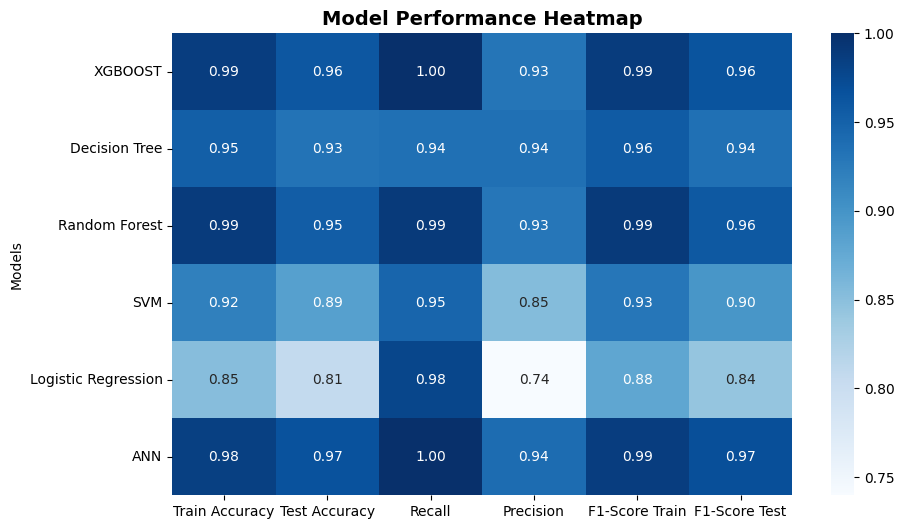

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Models"), annot=True, cmap="Blues", fmt=".2f")

plt.title("Model Performance Heatmap", fontsize=14, fontweight="bold")
plt.show()

## 8.Generating confusion metrices

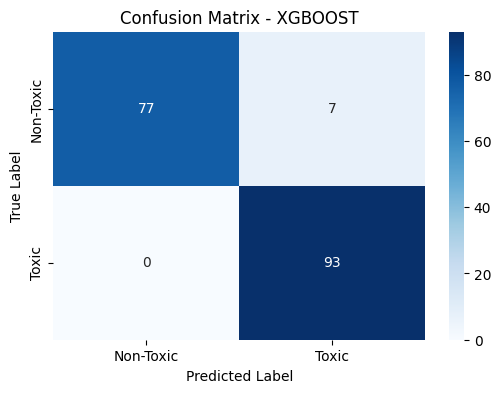

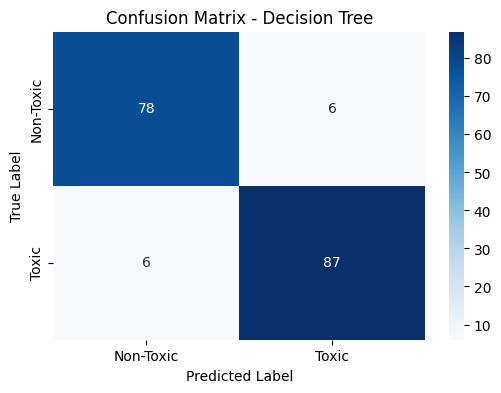

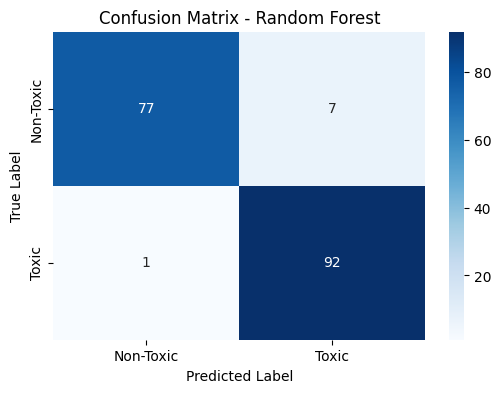

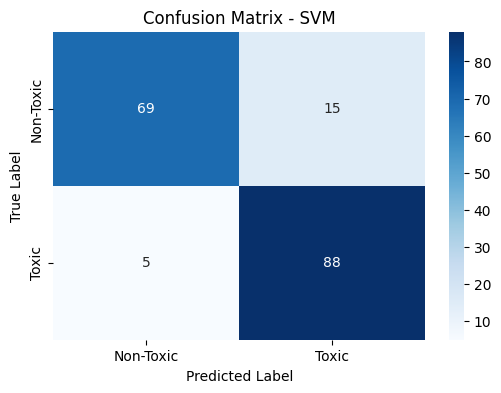

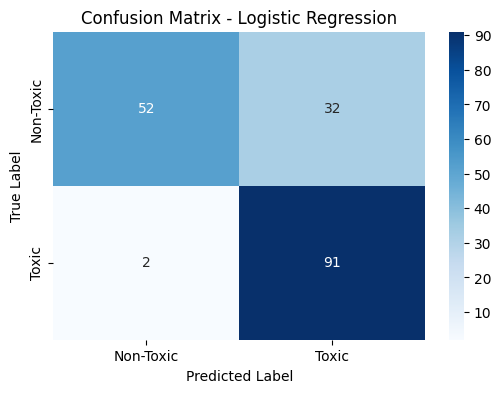

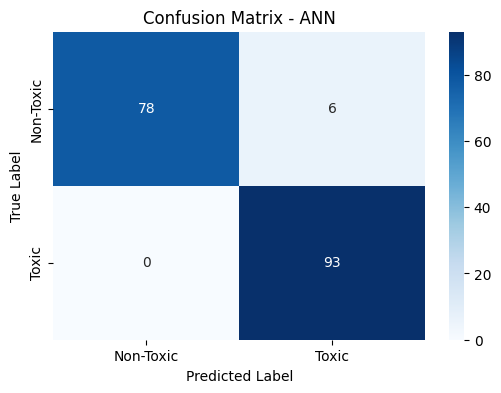

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model_name, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Generating confusion matrices for each model
for name, model in models.items():
   y_pred_test = model.predict(x_test_scaled)
   plot_confusion_matrix(name, y_test, y_pred_test)

## 9. Feature Importance Plot

Feature Importance tells you which features (variables) contribute the most to your model’s predictions.



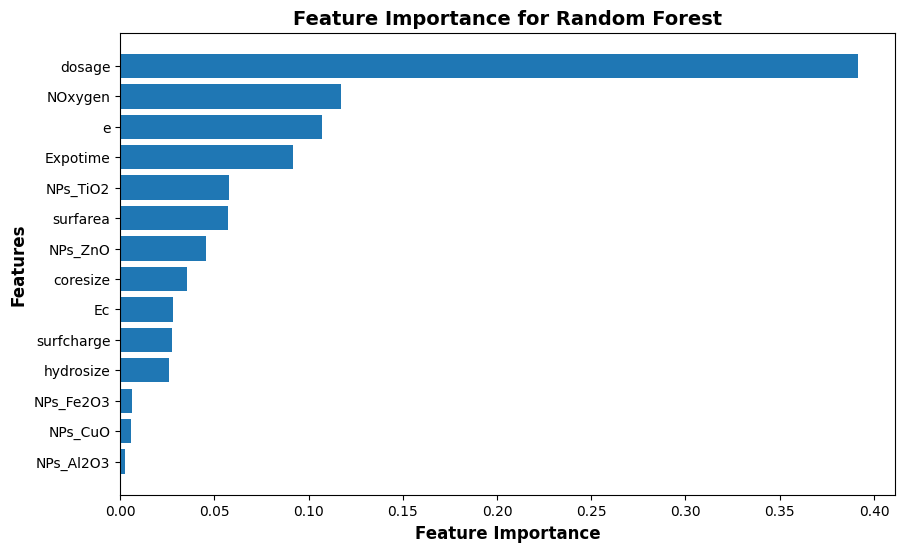

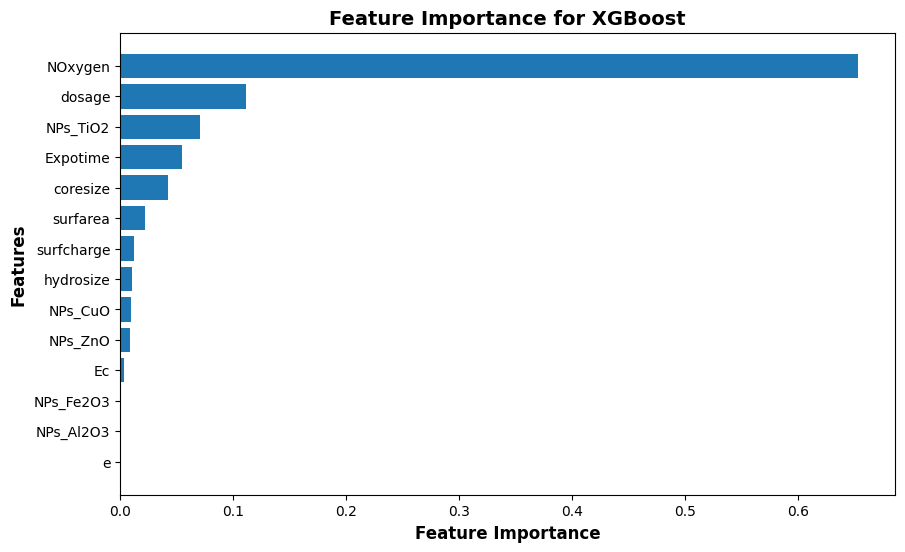

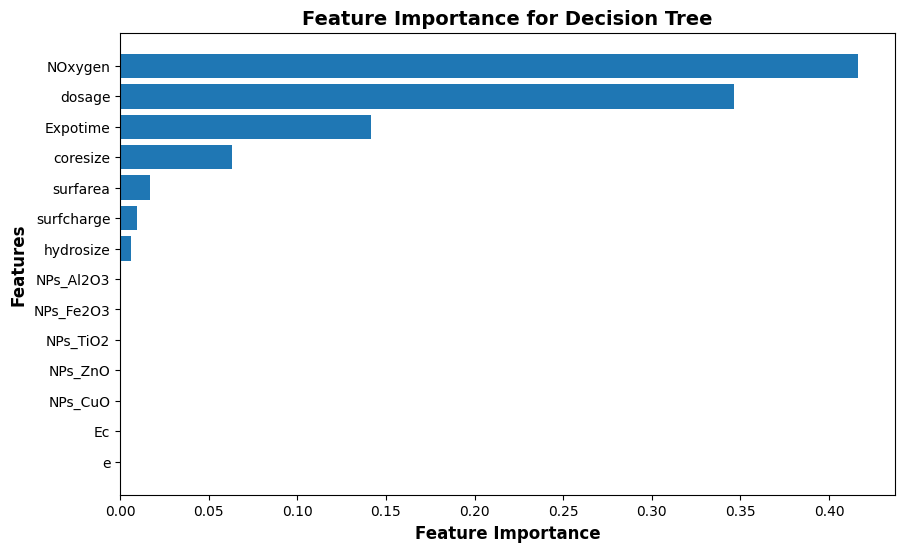

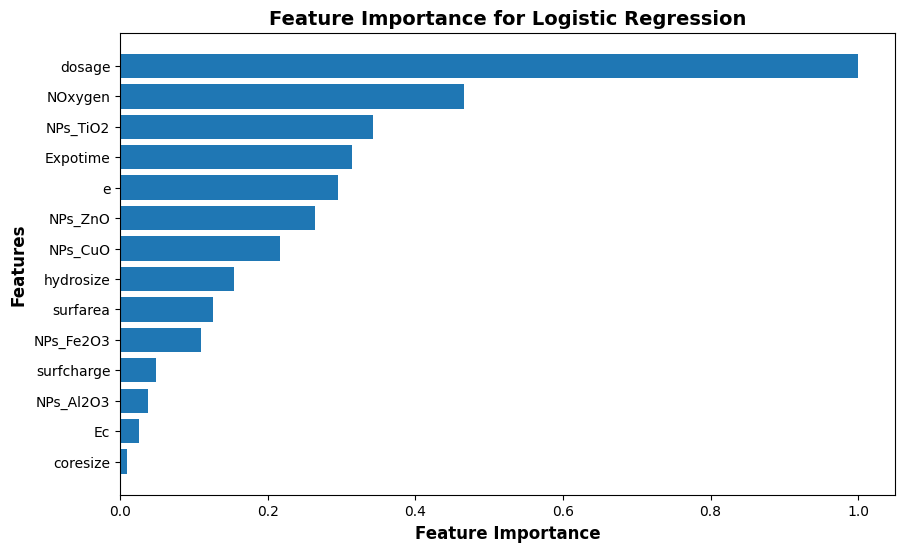

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(model, feature_names, model_name):
    # To check if the model has 'feature_importances_' (only works for tree-based models)
    if hasattr(model, "feature_importances_") :
        feature_importance = model.feature_importances_
    elif hasattr(model, "coef_"):  # For Logistic Regression & SVM
        feature_importance = np.abs(model.coef_ / model.coef_.max()).flatten()
    else:
        print(f" Feature importance not available for {model_name}")
        return  # Stop execution if model doesn't support feature importance

    sorted_idx = np.argsort(feature_importance)  # Sort features by importance

    plt.figure(figsize=(10,6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.xlabel("Feature Importance", fontsize=12, fontweight="bold")
    plt.ylabel("Features", fontsize=12, fontweight="bold")
    plt.title(f"Feature Importance for {model_name}", fontsize=14, fontweight="bold")
    plt.show()

plot_feature_importance(rf, x_train_scaled.columns, "Random Forest")
plot_feature_importance(xgb_model, x_train_scaled.columns, "XGBoost")
plot_feature_importance(dt, x_train_scaled.columns, "Decision Tree")
plot_feature_importance(lr, x_train_scaled.columns, "Logistic Regression")

In [54]:
!pip install shap


In [58]:
# a SHAP plot shows how much each feature pushed a prediction toward one class or the other.

import shap

# Telling SHAP to use JS visualizations in Colab
shap.initjs()

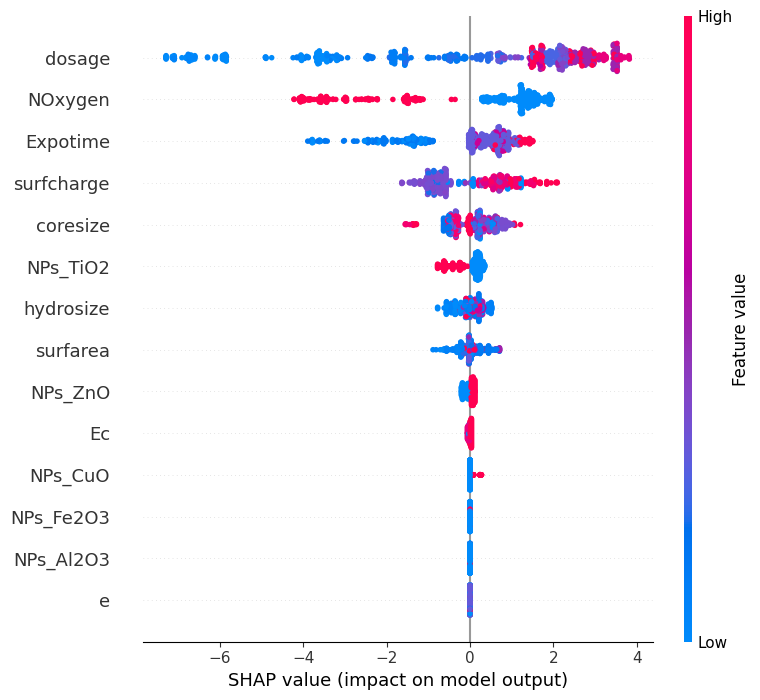

In [59]:
explainer = shap.Explainer(xgb_model, x_train_scaled)
shap_values = explainer(x_train_scaled)
shap.summary_plot(shap_values, x_train_scaled)
